
Probando mu dentro de los límites 0.01 a 1.0...

Probando mu1 dentro de los límites 0.01 a 1.0...

Probando nu dentro de los límites 0.01 a 1.0...

Probando nu1 dentro de los límites 0.01 a 1.0...

Probando alpha dentro de los límites 0.01 a 1.0...

Probando x0 dentro de los límites 0.001 a 0.1...

Probando y0 dentro de los límites 0.001 a 0.1...


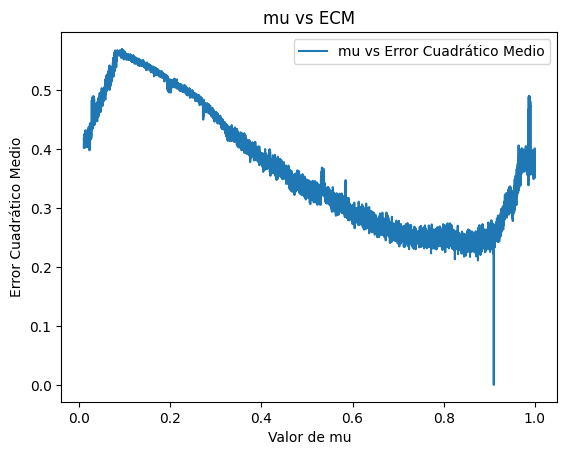

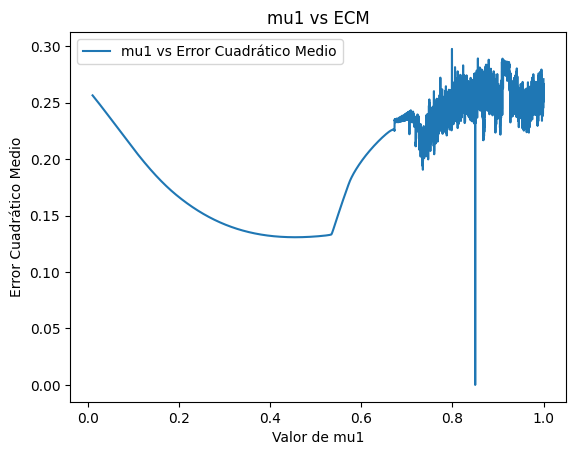

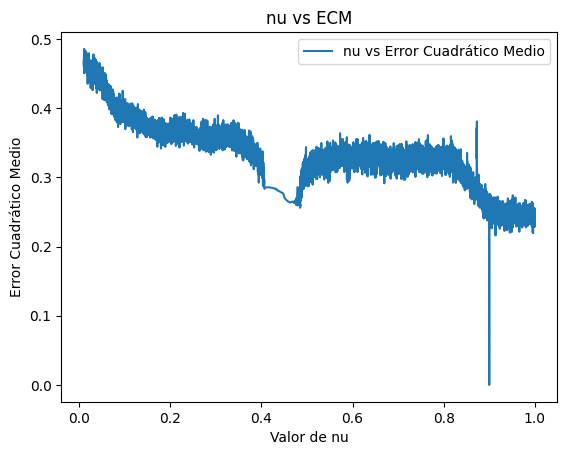

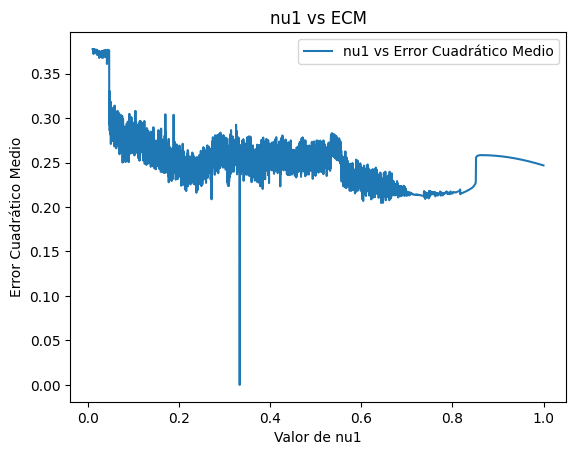

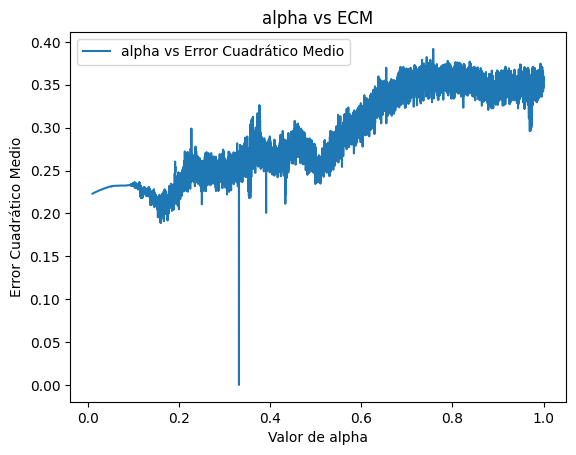

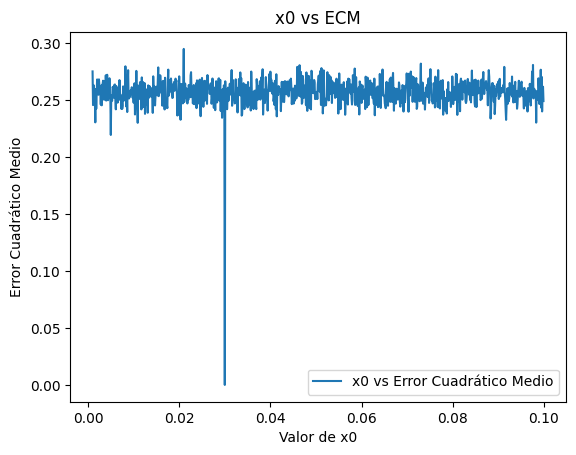

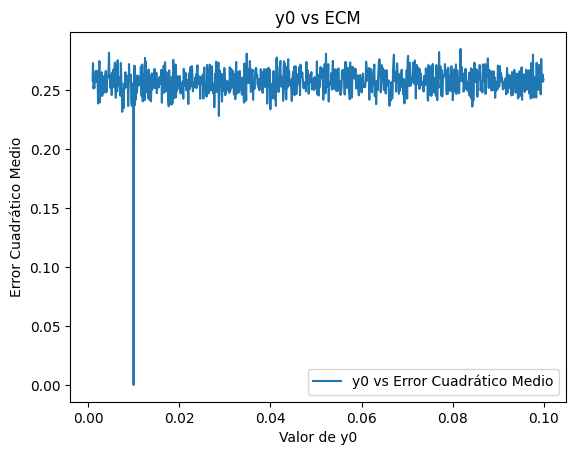

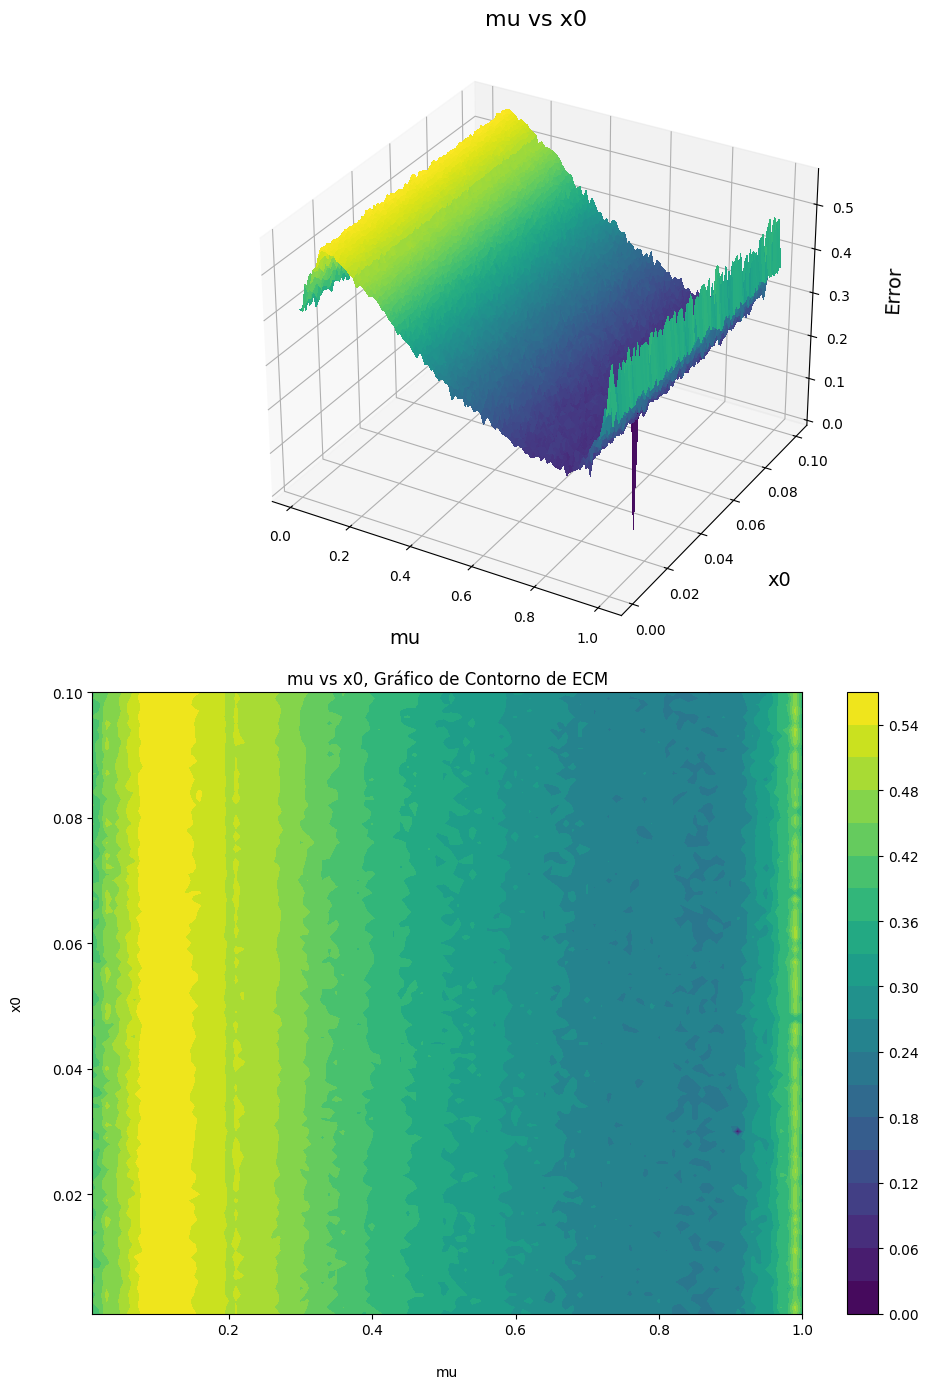

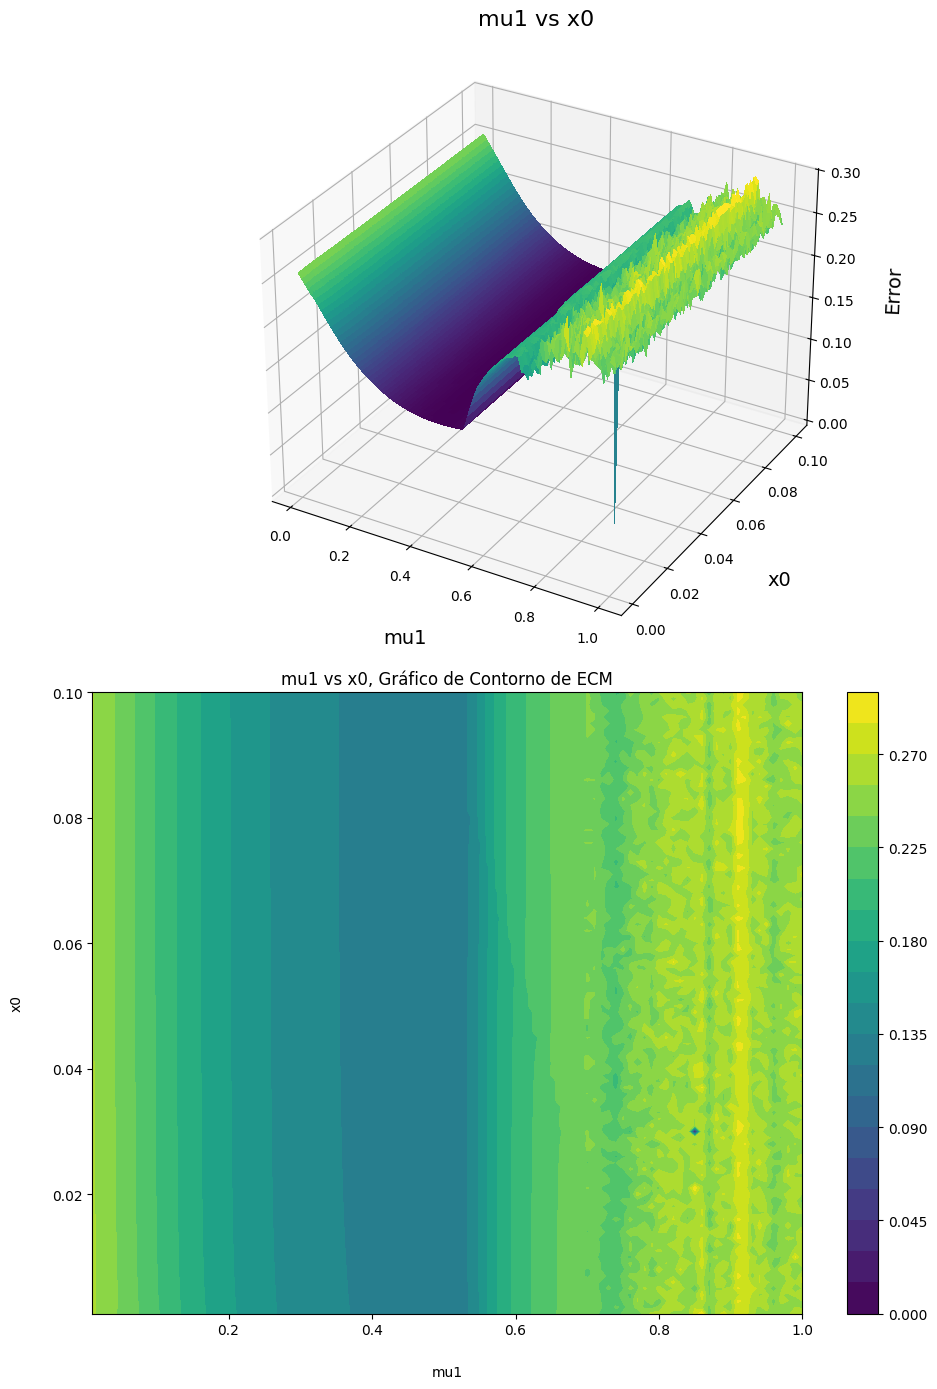

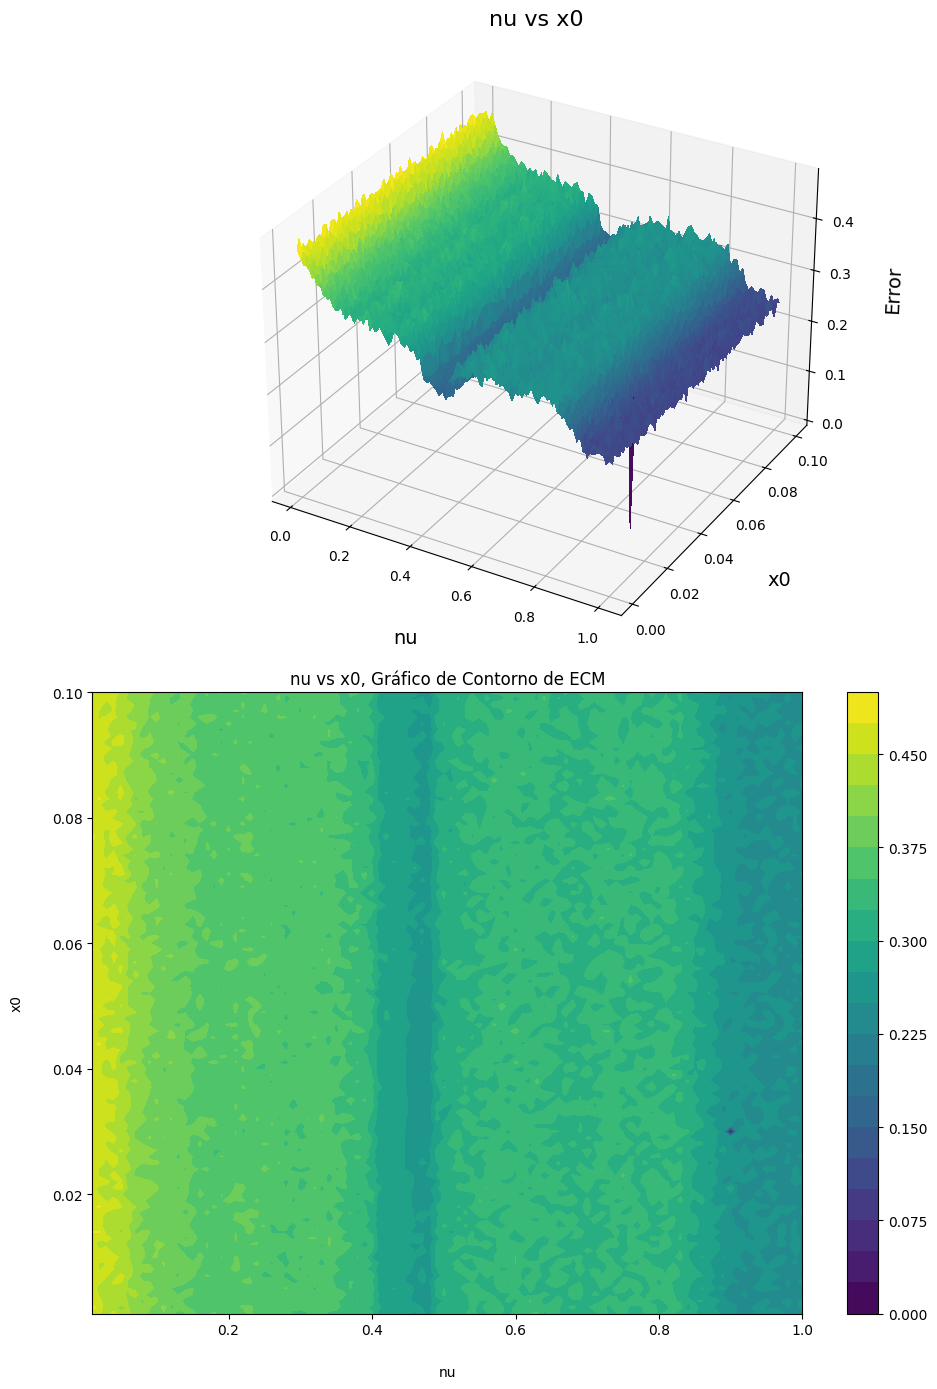

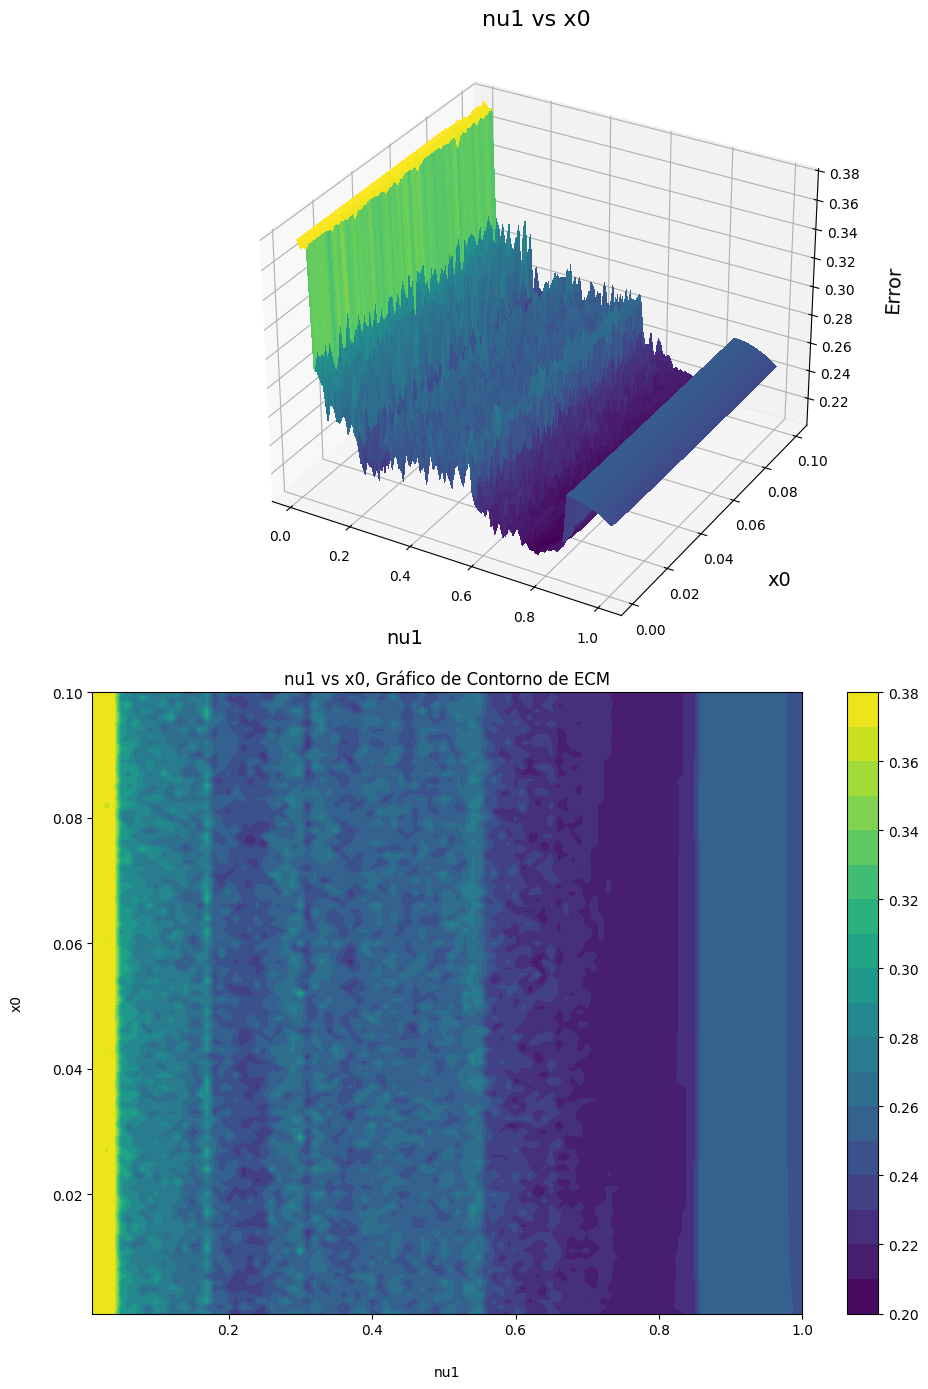

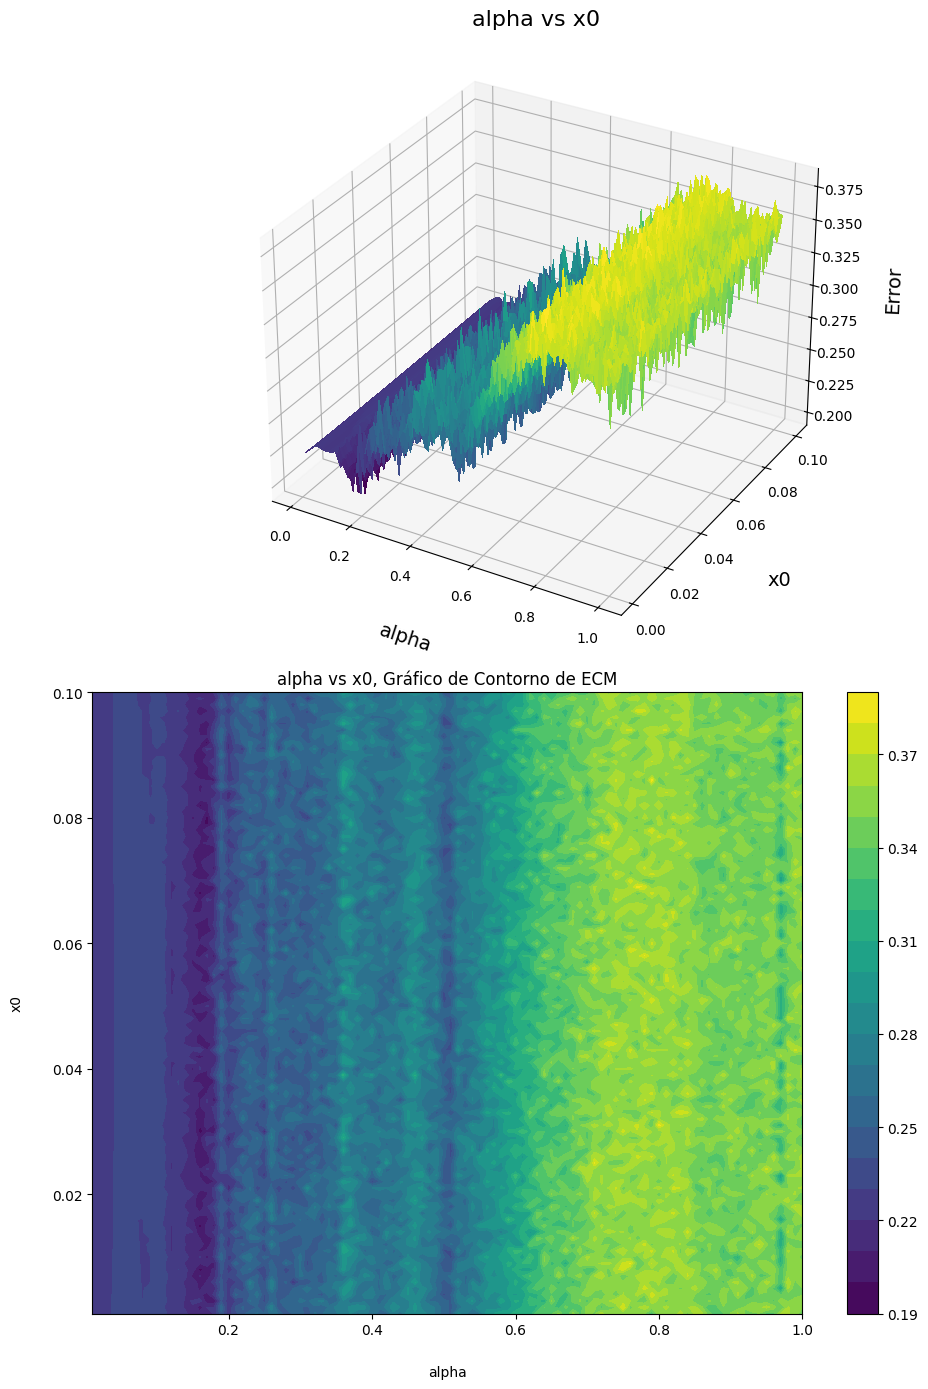

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

def log_map(v, r, q):
    if v <= r:
        return (((-q/(r*r)) * ((r-v)*(r-v))) + q)
    else:
        return (((-q/((1-r)*(1-r))) * ((r-v)*(r-v))) + q)

def sim_mapa(params, iterations=1000, verbose=False):
    mu, mu1, nu, nu1, alpha, x0, y0 = params
    x = [x0]
    y = [y0]

    for i in range(1, iterations):
        xn = (log_map(x[i - 1], nu, mu) + (alpha * (y[i - 1] - x[i - 1]))) % 1
        yn = (log_map(y[i - 1], nu1, mu1) + (alpha * (x[i - 1] - y[i - 1]))) % 1
        x.append(xn)
        y.append(yn)

    return np.column_stack((x, y))

def objective_function(estimated_params):
    estimated_output = sim_mapa(estimated_params)
    iterations = 1000
    error = 1/iterations*np.sum((true_output - estimated_output) ** 2)
    return error


true_params = [0.91, 0.85, 0.9, 0.333, 0.3314, 0.03, 0.01]
true_output = sim_mapa(true_params)

# Límites de los parámetros para la simulación
lower_bounds = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.001, 0.001])
upper_bounds = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 0.1, 0.1])

step_size = 0.0001

results = {}

# Se itera para cada parámetro
for param_index in range(len(true_params)):
    param_name = ['mu', 'mu1', 'nu', 'nu1', 'alpha', 'x0', 'y0'][param_index]
    print(f"\nProbando {param_name} dentro de los límites {lower_bounds[param_index]} a {upper_bounds[param_index]}...")

    # Se inicializa el array donde se almacenan los resultados de los parámetros
    param_results = []

    # Reiniciar todos los parámetros a los originales
    current_params = true_params.copy()

    # Variar específicamente uno de los parámetros entre su lower y upper bound
    for value in np.arange(lower_bounds[param_index], upper_bounds[param_index], step_size):
        value = round(value, 4)
        current_params[param_index] = value
        error = objective_function(current_params)
        param_results.append((value, error))

    results[param_name] = param_results

# Graficar cada parámetro vs. error de la función objetivo
for param, result in results.items():
    values, errors = zip(*result)  # Separar valores y errores
    plt.figure()
    plt.plot(values, errors, label=f'{param} vs Error Cuadrático Medio')
    plt.xlabel(f'Valor de {param}')
    plt.ylabel('Error Cuadrático Medio')
    plt.title(f'{param} vs ECM')
    plt.legend()
    plt.show()



# Parámetros a iterar (excluyendo x0 y y0)
param_names = ['mu', 'mu1', 'nu', 'nu1', 'alpha']
param_indices = [0, 1, 2, 3, 4]

# Iterar a través de todos los parámetros y generar gráficos
for param_index in param_indices:
    param_name = param_names[param_index]

    # Generar valores de x0 para los gráficos 3D de superficie y contorno
    x0_values = np.linspace(lower_bounds[5], upper_bounds[5], 100)
    param_values = np.linspace(lower_bounds[param_index], upper_bounds[param_index], 100)

    # Crear malla para el parámetro (eje x), x0 (eje y), y calcular la función objetivo (eje z)
    X, Y = np.meshgrid(param_values, x0_values)
    Z = np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            current_params = true_params.copy()
            current_params[param_index] = X[i, j]
            current_params[5] = Y[i, j]  # Fijar y0 y cambiar x0
            Z[i, j] = objective_function(current_params)

    # Crear el gráfico con dos subplots verticales
    fig = plt.figure(figsize=(10, 14))

    # Gráfico 3D de superficie
    ax = fig.add_subplot(211, projection='3d')  # 211 indica una fila, dos columnas, posición 1
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, rstride=1, cstride=1, antialiased=False)
    
    # Ajustar etiquetas y título con tamaño de letra más grande
    ax.set_xlabel(f'{param_name}', labelpad=20, fontsize=14)  # Tamaño de letra ajustado
    ax.set_ylabel('x0', labelpad=20, fontsize=14)  # Tamaño de letra ajustado
    ax.set_zlabel('Error', labelpad=15, fontsize=14)  # Tamaño de letra ajustado
    ax.set_title(f'{param_name} vs x0', fontsize=16)  # Tamaño de letra ajustado


    # Gráfico 2D de contorno
    ax2 = fig.add_subplot(212)
    contour = ax2.contourf(X, Y, Z, 20, cmap='viridis')
    ax2.set_xlabel(f'{param_name}', labelpad=20)  # Añadir margen para evitar superposición
    ax2.set_ylabel('x0', labelpad=20)  # Añadir margen para evitar superposición
    ax2.set_title(f'{param_name} vs x0, Gráfico de Contorno de ECM')

    # Añadir barra de colores para el gráfico de contorno
    fig.colorbar(contour, ax=ax2)

    plt.tight_layout()
    plt.show()
